In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv("economic_index.csv")

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of     interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.7

In [10]:
df.info

<bound method DataFrame.info of     interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75 

In [11]:
import seaborn as sns

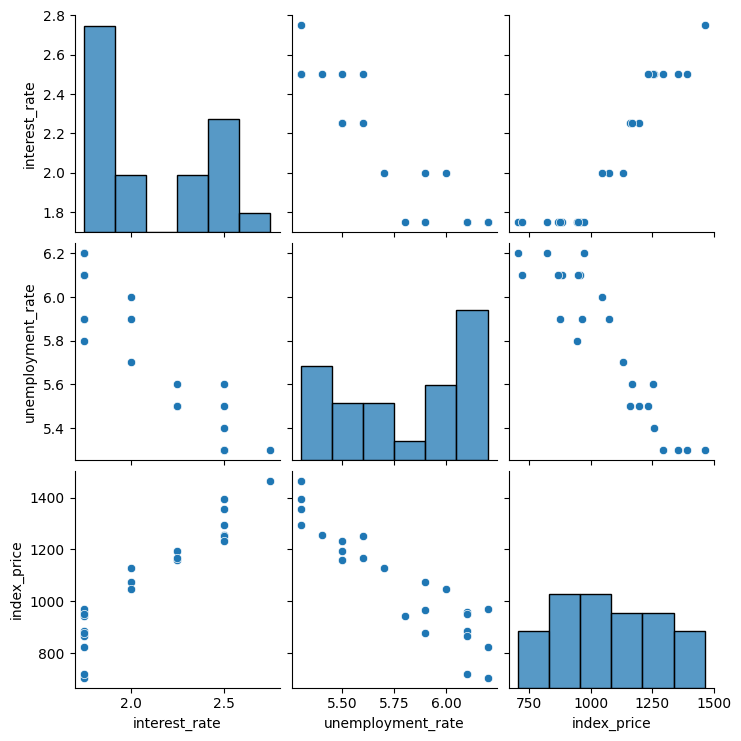

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


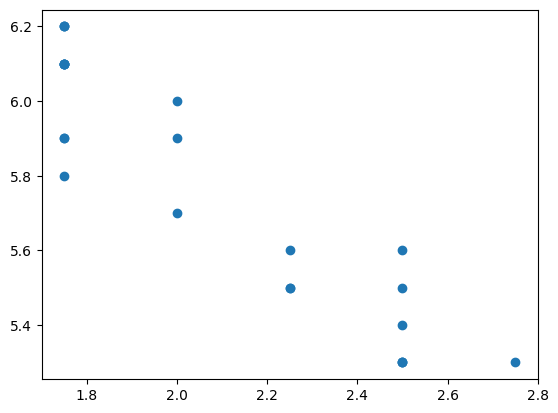

In [14]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])

In [15]:
#independent and dependent feature
x=df.iloc[:,:-1] # independent thats why a dataframe
y=df.iloc[:,-1] # depended thats why a series

In [16]:
#splitting data into test and train data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

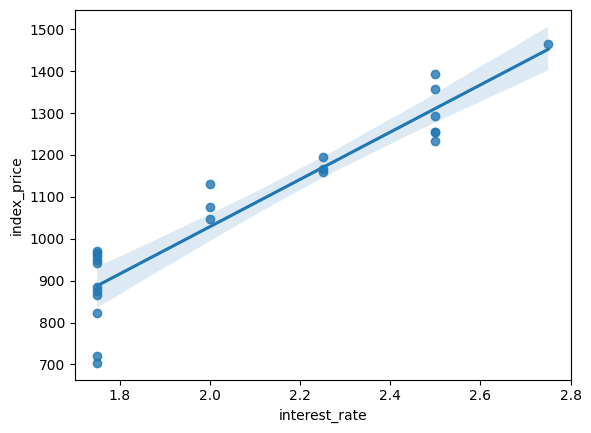

In [17]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

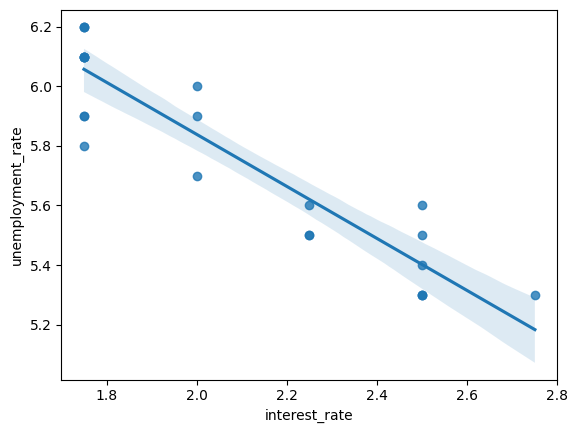

In [18]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

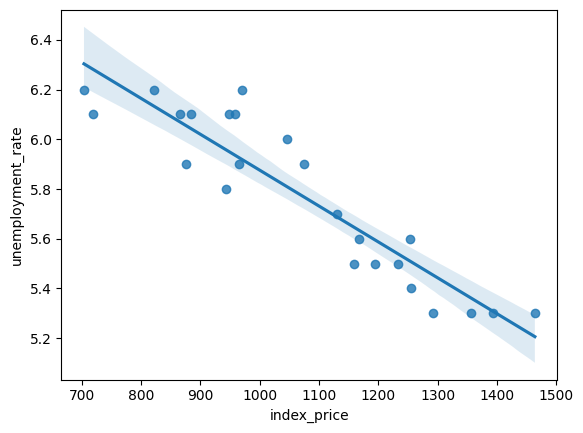

In [19]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [26]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [29]:
mean_validation_score = np.mean(validation_score)

In [30]:
#prediction
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)

Mean Squared Error :  8108.567426306604
Mean Absolute Error :  73.80444932337097
Root Mean Squared Error :  90.04758423359621


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7591371539010257

In [33]:
adjusted_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.5985619231683761


# Assumptions of Linear Regression

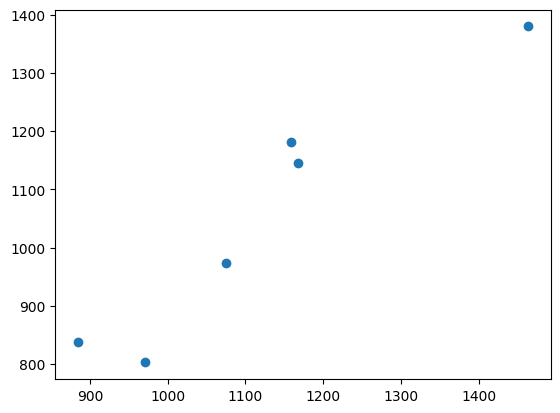

In [35]:
plt.scatter(y_test,y_pred)

In [36]:
residual = y_test - y_pred
print(residual)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


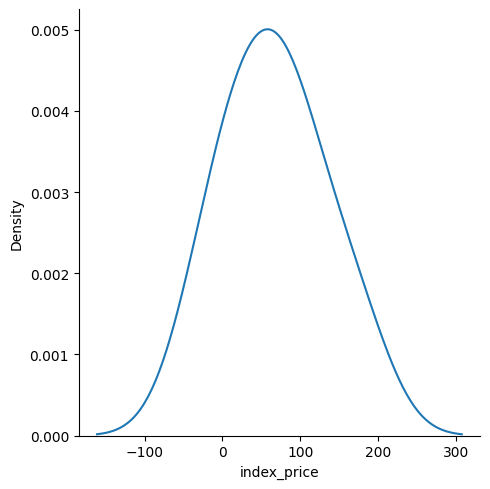

In [38]:
sns.displot(residual,kind='kde')

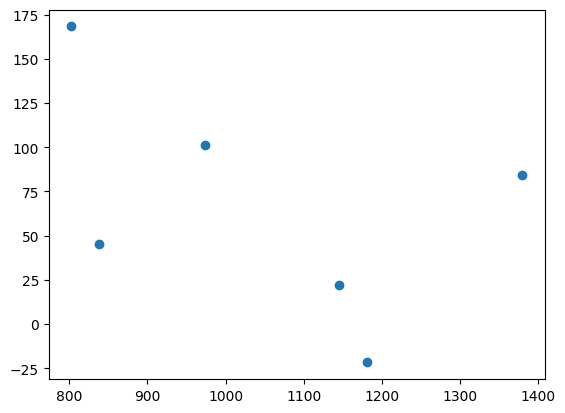

In [39]:
plt.scatter(y_pred,residual)